<a id='top'></a>

# CSCI3022 F20
# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: Willem Scott

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 4**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a/ id='p1'></a>

### (20 points) Problem 1: Theory (Sampling)
***

<img style="float: left; width: 200px; padding: 3mm;" src="https://upload.wikimedia.org/wikipedia/commons/5/57/Acme_ballot_box_-_Smithsonian.jpg" alt="A ballot box"/>  
You are the head of a news outlet on election day. You have embedded journalists in key U.S. States in order sample voters at different polling stations in the states. Once your journalists choose a polling station, they monitor the station for the election day. The journalists then report back the number of votes for each candidate, which is recorded in a special App on your phone, called Hippocampus. Overall, your team collected data from 6 polling stations in Alaska, 36 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California.

You want to get a sense of the average amount of votes for each candidate per polling station, so you use the Hippocampus app to randomly choose 1 polling station in Alaska, 6 polling stations in Ohio, 2 polling stations in Colorado, 1 polling station in Iowa, and 7 polling stations from California.

$$ \quad $$
    
**Part A:** Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

Population: All voters from polling stations across the United States

Sample Frame: All voters from 6 polling stations in Alaska, 36 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California

Sample: All voters from 1 polling station in Alaska, 6 polling stations in Ohio, 2 polling stations in Colorado, 1 polling station in Iowa, and 7 polling stations from California

Type of Sample: Stratified sampling

Quantity of Interest: Number of votes per candidate per polling station

**Part B:** You repeat your sampling, again using the Hippocampus app. Now, you order the stations alphabetically by State and choose every 3rd data value.
    
Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

Population: All voters from polling stations across the United States

Sample Frame: All voters from 6 polling stations in Alaska, 36 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California

Sample: All voters from 2 polling station in Alaska, 12 polling stations in Ohio, 4 polling stations in Colorado, 2 polling station in Iowa, and 14 polling stations from California

Type of Sample: Systematic sampling

Quantity of Interest: Number of votes per candidate per polling station

[Back to top](#top)

<br>

<a/ id='p2'></a>

### (20 points) Problem 2: Theory and Computation (Means and Medians)
***

A method to investigate the sensitivity of the sample mean and sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the effect when $y$ changes. To illustrate this, consider the following dataset:
 
$$  4.2 \quad 5.1 \quad 5.0 \quad y \quad 3.8 \quad 4.1 \quad 5.5 \quad 1.9 $$




**Part A:** Compute the sample mean and sample median for $y=1.5$. Then compute both quantities again for $y=6$.

In [2]:
nums = [4.2, 5.1, 5.0, 3.8, 4.1, 5.5, 1.9]

print("The median for y = 1.5:", np.median(nums + [1.5]))
print("The mean for y = 1.5:", np.mean(nums + [1.5]))
print("The median for y = 6:", np.median(nums + [6]))
print("The mean for y = 6:", np.mean(nums + [6]))

The median for y = 1.5: 4.15
The mean for y = 1.5: 3.8875
The median for y = 6: 4.6
The mean for y = 6: 4.45


**Part B:** Is there a value for $y$ that would make the mean of the data equal to 6? If so, calculate the value of $y$ that makes the mean equal to 6. If not, clearly explain why not.
    
Is there a value for $y$ that would make the median of the data equal to 6? If so, calculate the values of $y$ that makes the median equal to 6. If not, clearly explain why not.

In [3]:

a = sum(nums)
# (a + y) / (len(nums) + 1) = 6
# a / (len(nums) + 1) + y / (len(nums) + 1) = 6
# 6 - a / (len(nums) + 1) = y / (len(nums) + 1)
y1 = 6 * (len(nums) + 1) - a

print("The value $y$ that would make the mean of the data equal 6 is:", y1)
print("The value $y$ that would make the median of the data equal 6 does not exist, since 6 is greater than the maximum value, there is no way to make it the median of the dataset without adding additional numbers.")



The value $y$ that would make the mean of the data equal 6 is: 18.4
The value $y$ that would make the median of the data equal 6 does not exist, since 6 is greater than the maximum value, there is no way to make it the median of the dataset without adding additional numbers.


**Part C**: Compute the sample variance and the sample standard deviation for the original dataset given in part A, with $y=6$.

In [4]:
knums = sorted(nums + [6])
nmean = np.mean(knums)

variance = 1/(len(knums) - 1) * sum((nmean - x) ** 2 for x in knums)
stdev = variance ** .5

print("The sample variance is:", variance)
print("The sample standard deviation is:", stdev)

The sample variance is: 1.62
The sample standard deviation is: 1.2727922061357855


**Part D**: Compute the sample median for the following cases: 
- $y=5$ 
- $y=50$ 
- $y=4.36$ 
- $y \to \infty$ 
- $y \to -\infty$

In [5]:
print("Sample median for $y = 5$:", np.median(nums + [5]))
print("Sample median for $y = 50$:", np.median(nums + [50]))
print("Sample median for $y = 4.36$:", np.median(nums + [4.36]))
print("Sample median for $y \\to \\infty$:", np.median(nums + [sys.float_info.max]))
print("Sample median for $y \\to -\\infty$:", np.median(nums + [-sys.float_info.max]))

Sample median for $y = 5$: 4.6
Sample median for $y = 50$: 4.6
Sample median for $y = 4.36$: 4.28
Sample median for $y \to \infty$: 4.6
Sample median for $y \to -\infty$: 4.15


**Part E**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on? Specifically, for what sets of $y$ values does the median take on its different possible values?

The sample mean can take on any number.
The sample median can take on any number between 4.1 and 4.6, given the value of $y$ is between 4.1 and 4.6 inclusive, otherwise the median cannot take on any new value.

**Part F**: Describe in words or mathematical notation, what happens to the sample standard deviation when $y$ is varied in the following ways: 
 
- $y \to \infty$ 
- $y \to \bar{x}$

When $y \to \infty$ the standard deviation also goes to infinity, but when $y \to \bar{x}$, then the standard deviation does not change.

[Back to top](#top)
<a/ id='p6'></a>

## (20 pts) Problem 3: Computation (Scaling)
***
Consider the following 3 data sets:

`A=[0,1,2,3,4,5,6,7,8,9,10,11,12]`

`B=[0,0,0,12,7,18,47,25,0,13,0,35]`

`C` is the random data set generated by using `np.random.exponential(scale=43, size=1000)`

For each data set, perform the following computations in parts A, B, and C:

**Part A:** Compute and print the mean and standard deviation of the data set.

In [6]:
A=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12]) # I think its funny that we're told what these variables are but they're never defined
B=np.array([0,0,0,12,7,18,47,25,0,13,0,35])
C=np.random.exponential(scale=43, size=1000)
# print("A:", A)
# print("B:", B)
# print("C:", C)

print(f"The mean for dataset A is: {np.mean(A):.2f}",)
print(f"The mean for dataset B is: {np.mean(B):.2f}")
print(f"The mean for dataset C is: {np.mean(C):.2f}")

print(f"The standard deviation for dataset A is: {np.std(A):.2f}",)
print(f"The standard deviation for dataset B is: {np.std(B):.2f}",)
print(f"The standard deviation for dataset C is: {np.std(C):.2f}",)

The mean for dataset A is: 6.00
The mean for dataset B is: 13.08
The mean for dataset C is: 42.38
The standard deviation for dataset A is: 3.74
The standard deviation for dataset B is: 14.97
The standard deviation for dataset C is: 40.48


**Part B:** Compute and print the mean and standard deviation of the new data set formed by subtracting the original mean from each observation.

In [7]:
print(f"The mean for dataset A is: {np.mean(A - np.mean(A)):.2f}",)
print(f"The mean for dataset B is: {np.mean(B - np.mean(B)):.2f}")
print(f"The mean for dataset C is: {np.mean(C - np.mean(C)):.2f}")

print(f"The standard deviation for dataset A is: {np.std(A - np.mean(A)):.2f}",)
print(f"The standard deviation for dataset B is: {np.std(B - np.mean(B)):.2f}",)
print(f"The standard deviation for dataset C is: {np.std(C - np.mean(C)):.2f}",)

The mean for dataset A is: 0.00
The mean for dataset B is: -0.00
The mean for dataset C is: 0.00
The standard deviation for dataset A is: 3.74
The standard deviation for dataset B is: 14.97
The standard deviation for dataset C is: 40.48


**Part C:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation and then dividing by the original standard deviation.

In [8]:
print(f"The mean for dataset A is: {np.mean((A - np.mean(A))/np.std(A)):.2f}",)
print(f"The mean for dataset B is: {np.mean((B - np.mean(B))/np.std(B)):.2f}",)
print(f"The mean for dataset C is: {np.mean((C - np.mean(C))/np.std(C)):.2f}",)

print(f"The standard deviation for dataset A is: {np.std((A - np.mean(A))/np.std(A)):.2f}",)
print(f"The standard deviation for dataset B is: {np.std((B - np.mean(B))/np.std(B)):.2f}",)
print(f"The standard deviation for dataset C is: {np.std((C - np.mean(C))/np.std(C)):.2f}",)

The mean for dataset A is: -0.00
The mean for dataset B is: -0.00
The mean for dataset C is: 0.00
The standard deviation for dataset A is: 1.00
The standard deviation for dataset B is: 1.00
The standard deviation for dataset C is: 1.00


**Part D:** Why might this result matter?

We can use these methods to normalize a dataset to generate a chosen mean or standard deviation

**Part E:** Looking at each of the 3 data sets, come up with a real-world context where those kind of numbers might make for reasonable observations.

A: 12 most commonly chosen numbers for numbering a 12 question quiz

B: Test scores for Computer Systems

C: Population growth over 1000 years (in thousands)

[Back to top](#top)
<a/ id='p4'></a>

## (35 pts) Problem 4: Data (monthly patterns)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [9]:
dfPrecip = pd.read_csv('../Data/BoulderPrecip.csv')
dfPrecip.head()


,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.4,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.3,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.6,1.06,0.08,0.7,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2020 isn't over yet!  We have one row at the bottom that isn't fully complete and NA values have been filled into the months that haven't happened yet.  This can wreak havoc on a lot of our methods!  Drop the 2020 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric!

In [10]:
def conv(arg):
    try:
        return float(arg)
    except:
        return 0

def crow(r):
    return r.apply(conv)

dfPrecip = dfPrecip.drop([120])
dfPrecip = dfPrecip.apply(crow)
dfPrecip.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900.0,0.40,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901.0,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,0.00,1.43,13.85
2,1902.0,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903.0,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904.0,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.60,1.06,0.08,0.70,17.78


**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

<AxesSubplot:>

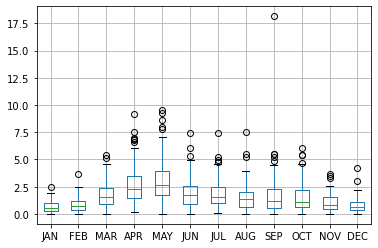

In [11]:
dfPrecip.boxplot(
    column=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"],
)



**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

<AxesSubplot:>

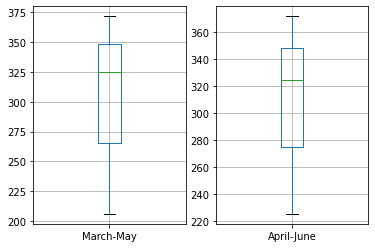

In [12]:
figure, axes = plt.subplots(1, 2)
nd = pd.DataFrame(dfPrecip[["MAR", "APR", "MAY"]].sum(), columns=["March-May"])
kd = pd.DataFrame(dfPrecip[["APR", "MAY", "JUN"]].sum(), columns=["April-June"])

nd.boxplot(ax=axes[0])
kd.boxplot(ax=axes[1])

# ndf = pd.DataFrame([nd, kd], columns=["March-May", "April-June"])
# ndf.boxplot()

**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [13]:
print("March-May:")
print(f"Mean: {float(nd.mean()):.2f}")
print(f"Standard Deviation: {float(nd.std()):.2f}")
print("5-number Summary:", ",".join(f"{float(nd.quantile(p)):.2f}" for p in [0, .25, .5, .75, 1]))

print("April-June:")
print(f"Mean: {float(kd.mean()):.2f}")
print(f"Standard Deviation: {float(kd.std()):.2f}")
print("5-number Summary:", ",".join(f"{float(kd.quantile(p)):.2f}" for p in [0, .25, .5, .75, 1]))

March-May:
Mean: 300.76
Standard Deviation: 85.54
5-number Summary: 205.81,265.25,324.68,348.23,371.79
April-June:
Mean: 307.28
Standard Deviation: 74.75
5-number Summary: 225.36,275.02,324.68,348.23,371.79


The only considerable reason for why we might want to favor one grouping over the other is that one has a smaller standard deviation, meaning more consistent rainfall over the course of the grouping, whereas the other grouping has marginally more sporadic downfall.

**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

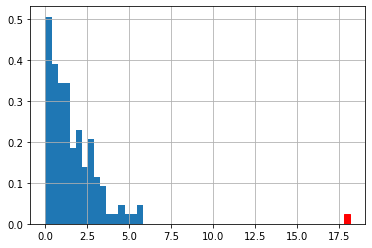

In [14]:
# print(dfPrecip["SEP"][113])
p = dfPrecip["SEP"].hist(bins=50, density=True)
bar_value_to_label = 18
min_distance = float("inf")  # initialize min_distance with infinity
index_of_bar_to_label = 0
for i, rectangle in enumerate(p.patches):  # iterate over every bar
    tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
        (rectangle.get_x() +
            (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
    if tmp < min_distance:  # we are searching for the bar with x cordinate
                            # closest to bar_value_to_label
        min_distance = tmp
        index_of_bar_to_label = i
p.patches[index_of_bar_to_label].set_color('r')

There is one major outlier September that recorded a maximum of 18.16 inches, which is not close to the next largest counted at 5.8 inches. Most often there is very little or no rainfall in September, but not visible on the graph, it is most common to have around 1 inch of rainfall. Its unimodal and positively skewed, with the outlier as a result of September 2013.